In [1]:
#main libraries
import tensorflow as tf
from tensorflow import keras

#helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 2s 1us/step


In [3]:
class_names = ['T-shirt / Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

Below is our Dataset Exploration. 

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_images)

10000

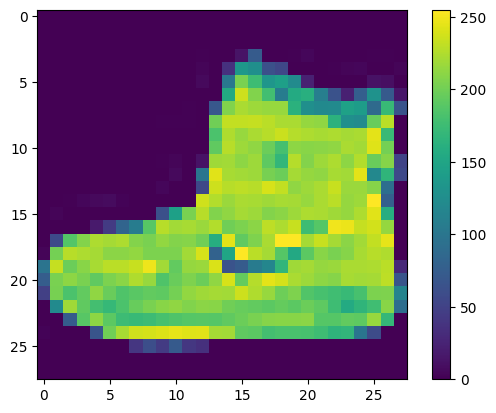

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.gca().grid(False)

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

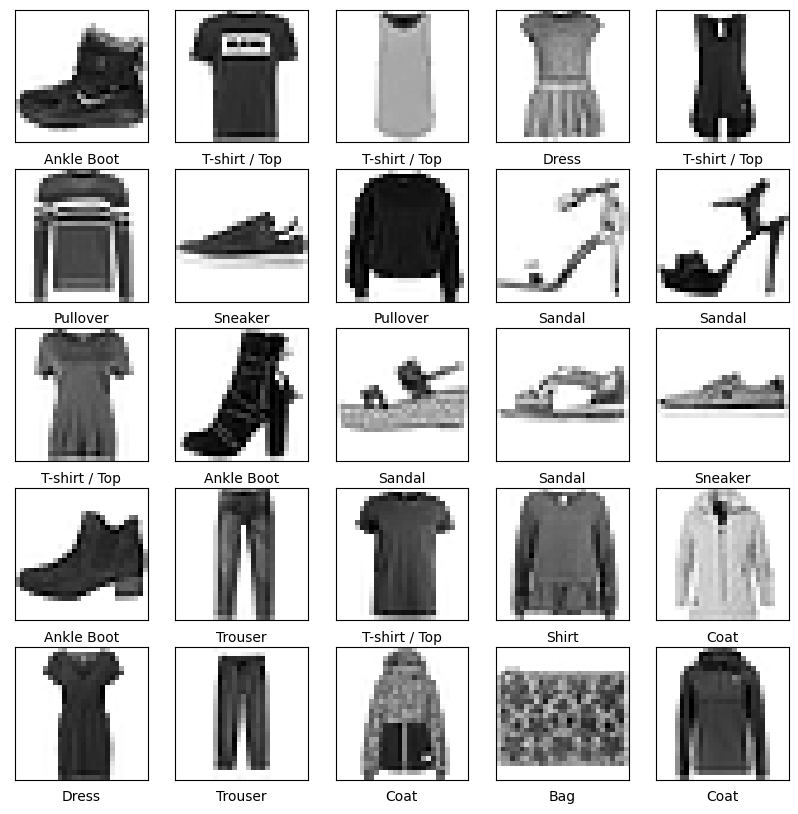

In [11]:
import matplotlib.pyplot as plt
#matplotlib inline

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [13]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 16s 6ms/step - loss: 0.4987 - accuracy: 0.8235
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3722 - accuracy: 0.8663
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3368 - accuracy: 0.8764
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3112 - accuracy: 0.8868
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2935 - accuracy: 0.8916
Epoch 6/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2778 - accuracy: 0.8969
Epoch 7/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2653 - accuracy: 0.9009
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2556 - accuracy: 0.9042
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2468 - accuracy: 0.9079
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - l

In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test Accuracy: ', test_acc)

313/313 [==============================] - 2s 4ms/step - loss: 0.3418 - accuracy: 0.8829
Test Accuracy:  0.8828999996185303


In [16]:
predictions = model.predict(test_images)

313/313 [==============================] - 2s 7ms/step


In [17]:
predictions[0]

array([4.4544710e-09, 2.9602199e-11, 4.6384145e-09, 6.4512463e-13,
       1.1142131e-10, 3.3892713e-05, 2.2196911e-08, 3.2692137e-01,
       7.6528526e-09, 6.7304474e-01], dtype=float32)

In [18]:
np.argmax(predictions[0])

9

In [19]:
test_labels[0]

9

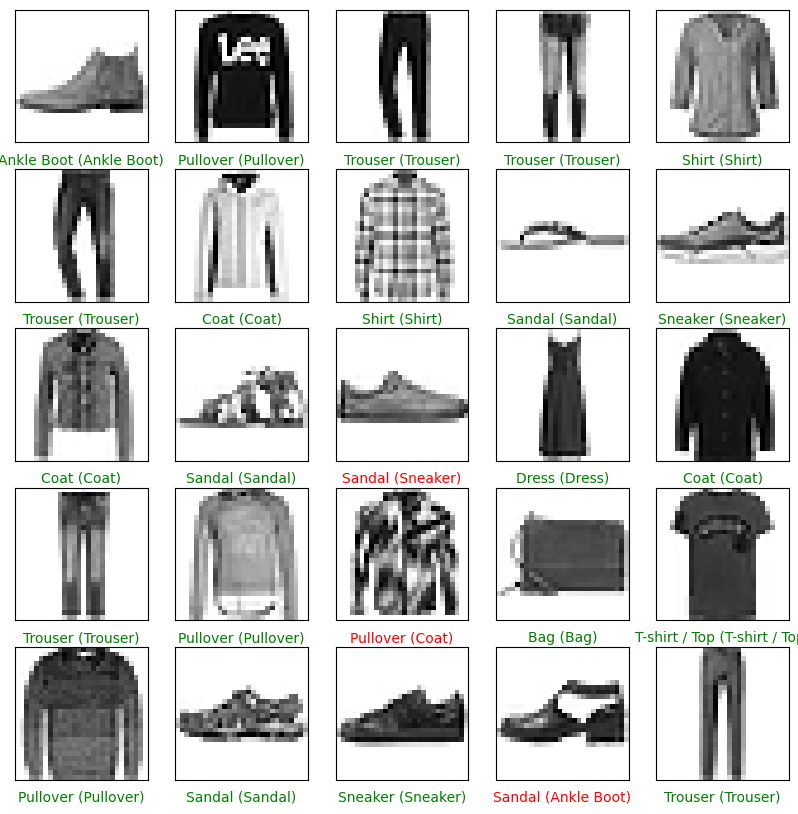

In [20]:
# Plot the first 25 test images, their predicted labels, and their true labels
# Color correct predictions in green, incorrect predictions in red
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(test_images[i], cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions[i])
  true_label = test_labels[i]
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'
  plt.xlabel("{} ({})".format(class_names[predicted_label],
                              class_names[true_label]),
                              color=color)

In [21]:
#Grab an image from test dataset
img = test_images[0]

print(img.shape)

(28, 28)


In [22]:
#Add the image to a batch where it's the only member
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [23]:
prediction = predictions[0]

np.argmax(prediction)

9